## Data Source

Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE: https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Import Data from COVID-19 time series

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 

COVID-19 Daily Reports

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

In [2]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-16-2020.csv')

In [3]:
latest_data.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2774.000000,2984.000000,2984.000000,3043.000000,3043.000000,3043.000000,3043.000000
mean,31274.175919,36.637183,-81.030622,707.245153,47.517581,178.212619,482.002300
std,17268.589814,10.015742,40.274685,7124.428380,726.174300,2861.437260,4690.598225
min,66.000000,-51.796300,-172.104600,0.000000,0.000000,0.000000,-54703.000000
25%,18103.500000,33.778672,-95.777228,4.000000,0.000000,0.000000,4.000000
50%,29142.000000,37.843679,-87.469020,16.000000,0.000000,0.000000,15.000000
75%,46086.500000,41.519934,-81.091508,78.500000,3.000000,0.000000,69.000000
max,99999.000000,71.706900,178.065000,184948.000000,22170.000000,77000.000000,111669.000000


In [4]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-16 23:30:51,34.223334,-82.461707,10,0,0,10,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-16 23:30:51,30.295065,-92.414197,108,6,0,102,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-16 23:30:51,37.767072,-75.632346,19,0,0,19,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-16 23:30:51,43.452658,-116.241552,567,9,0,558,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-16 23:30:51,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


## Get all the dates for the pandemic data

In [12]:
confirmed_df  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df     = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Get the COVID-19 confirmed-deaths-recoveries data

In [14]:
confirmed  = confirmed_df.loc[:, cols[4]:]
deaths     = deaths_df.loc[:, cols[4]:]
recoveries = recoveries_df.loc[:, cols[4]:]

In [15]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21
0,0,0,0,0,0,0,0,0,0,0,...,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044
1,0,0,0,0,0,0,0,0,0,0,...,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528
2,0,0,0,0,0,0,0,0,0,0,...,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842
3,0,0,0,0,0,0,0,0,0,0,...,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393
4,0,0,0,0,0,0,0,0,0,0,...,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558


In [16]:
# RECALL
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558


In [17]:
dates = confirmed.keys()
world_cases     = [confirmed[i].sum() for i in dates]
total_deaths    = [deaths[i].sum() for i in dates] 
total_recovered = [recoveries[i].sum() for i in dates] 

In [18]:
total_active    = (np.array(world_cases)-np.array(total_deaths)-np.array(total_recovered)).tolist()

In [19]:
mortality_rate  = (np.array(total_deaths)/np.array(world_cases)).tolist()
recovery_rate   = (np.array(total_recovered)/np.array(world_cases)).tolist()

## Convert time string to actual datetime objects

In [20]:
import datetime

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
dates_dt = [(start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y') for i in range(len(dates))]

## Plot Coronavirus Over Time

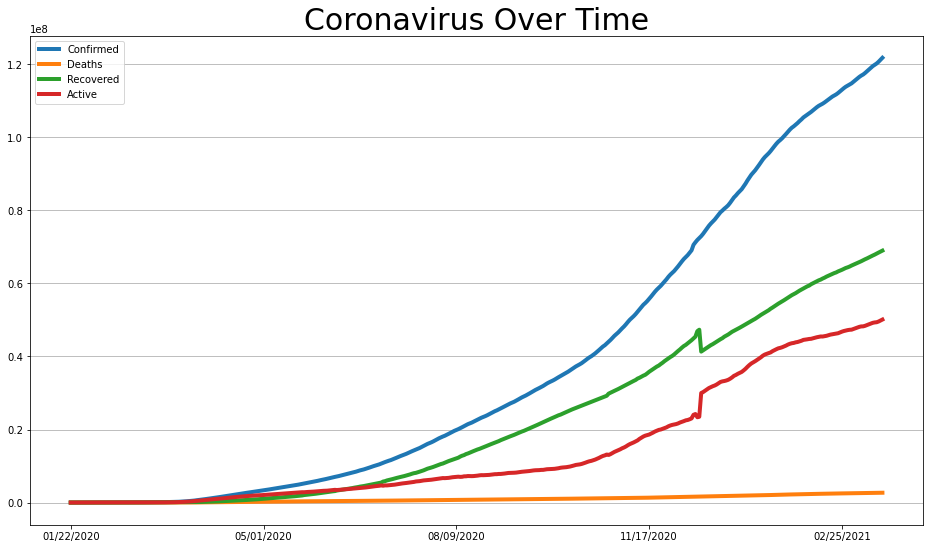

In [21]:
covid_df = pd.DataFrame(
    {'Confirmed': world_cases,
     'Deaths'   : total_deaths,
     'Recovered': total_recovered,
     'Active'   : total_active
    }, index=dates_dt)
covid_df.plot(figsize=(16, 9), linewidth=4).grid(axis='y')
plt.title('Coronavirus Over Time', size=30);

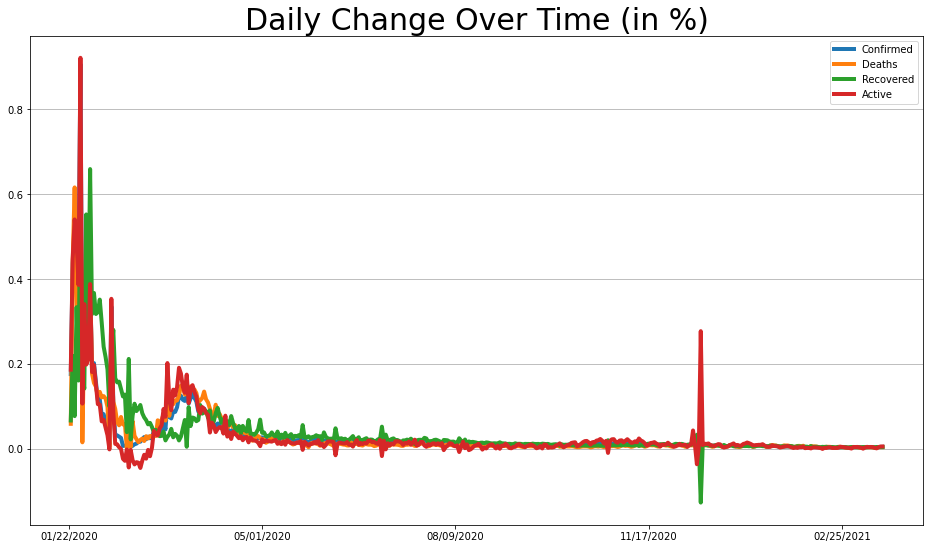

In [22]:
covid_df.pct_change().plot(figsize=(16, 9), linewidth=4).grid(axis='y')
plt.title('Daily Change Over Time (in %)', size=30);

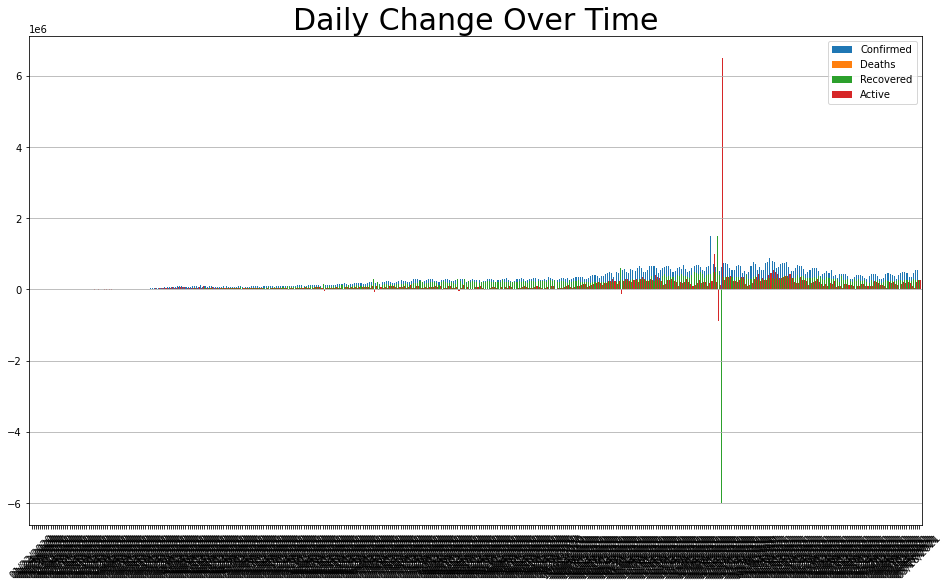

In [23]:
daily_change = covid_df.diff()
daily_change.plot.bar(figsize=(16, 9), linewidth=4, width=2).grid(axis='y')
plt.title('Daily Change Over Time', size=30)
plt.xticks(rotation=45);

In [24]:
daily_change.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

Text(0.5, 1.0, 'Global Confirmed COVID-19 Cases Daily Change Over Time')

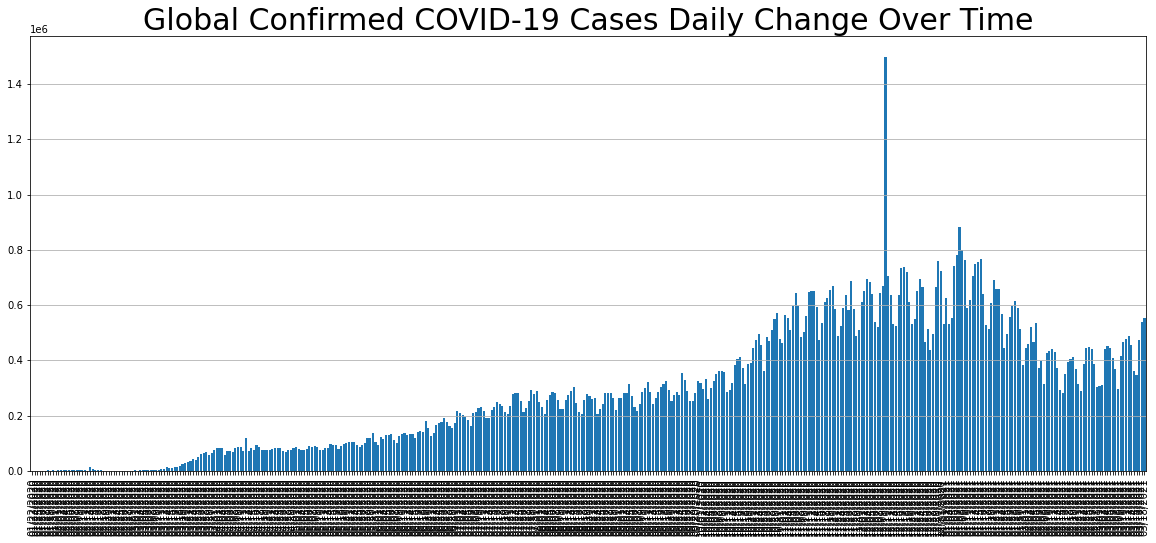

In [25]:
daily_change.Confirmed.plot.bar(figsize=(20, 8), linewidth=4, width=0.8).grid(axis='y')
plt.title('Global Confirmed COVID-19 Cases Daily Change Over Time', size=30)
#plt.xticks(rotation=45);

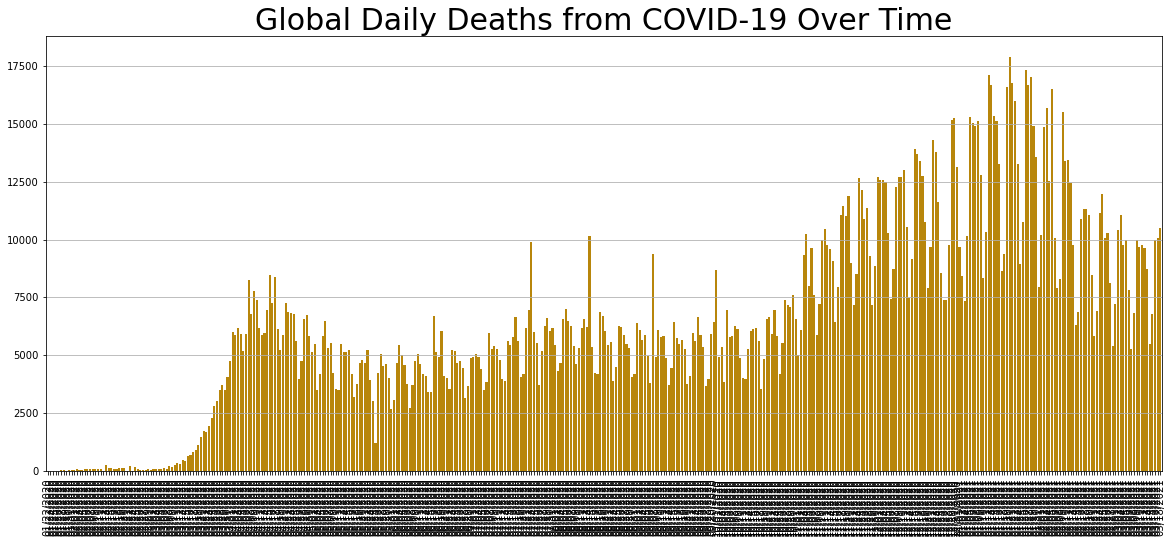

In [26]:
daily_change.Deaths.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='darkgoldenrod').grid(axis='y')
plt.title('Global Daily Deaths from COVID-19 Over Time', size=30);

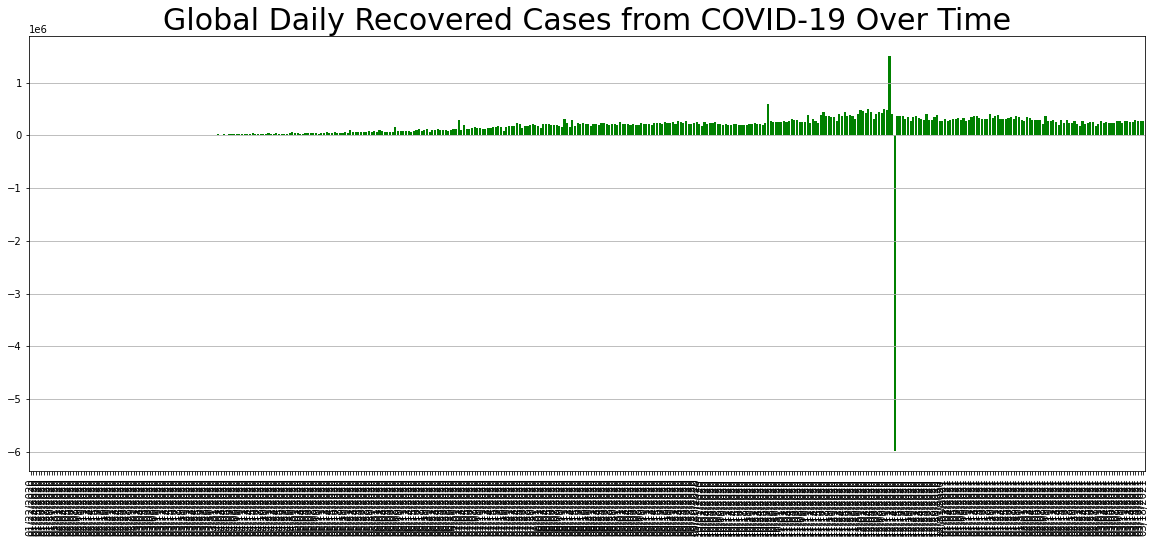

In [27]:
daily_change.Recovered.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='green').grid(axis='y')
plt.title('Global Daily Recovered Cases from COVID-19 Over Time', size=30);

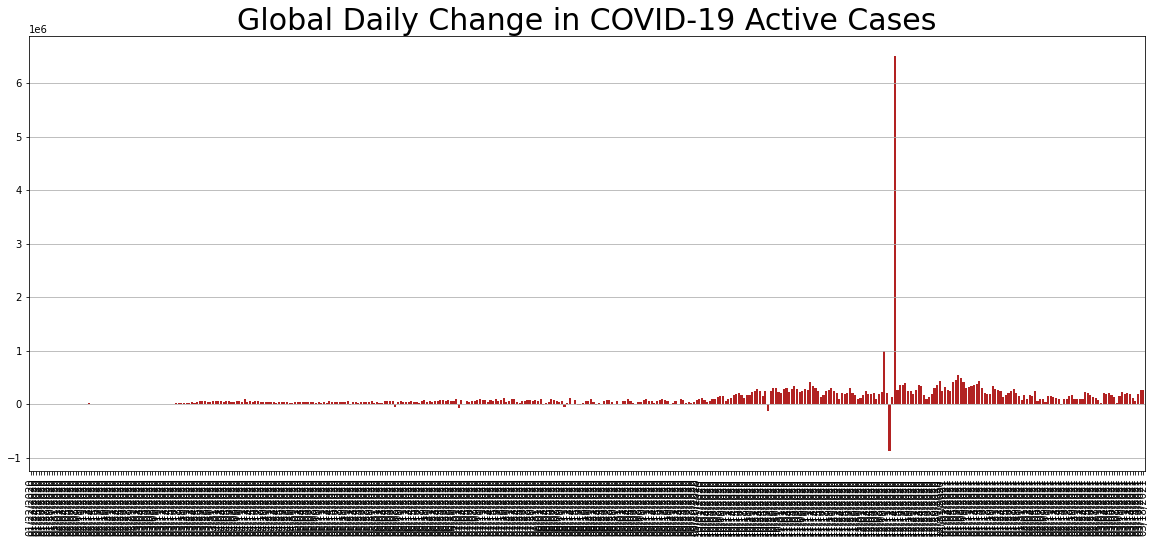

In [28]:
daily_change.Active.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='firebrick').grid(axis='y')
plt.title('Global Daily Change in COVID-19 Active Cases', size=30);

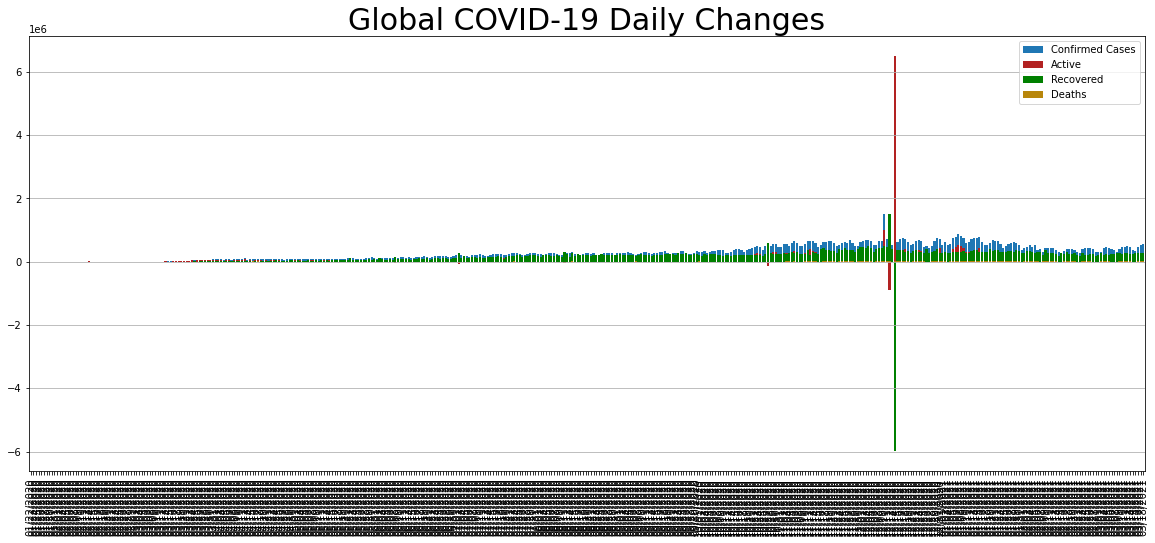

In [29]:
daily_change.Confirmed.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, label='Confirmed Cases', legend=True).grid(axis='y')
daily_change.Active.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='firebrick', label='Active', legend=True).grid(axis='y')
daily_change.Recovered.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='green', label='Recovered', legend=True).grid(axis='y')
daily_change.Deaths.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='darkgoldenrod', label='Deaths', legend=True).grid(axis='y')
plt.title('Global COVID-19 Daily Changes', size=30);

In [30]:
def get_data(country):
    cases = [confirmed_df[confirmed_df['Country/Region']==country][i].sum() for i in dates]
    daily_increase = pd.Series(cases).diff().tolist()
    deaths = [deaths_df[deaths_df['Country/Region']==country][i].sum() for i in dates]
    daily_death = pd.Series(deaths).diff().tolist()
    recoveries  = [recoveries_df[recoveries_df['Country/Region']==country][i].sum() for i in dates]
    daily_recovery = pd.Series(recoveries).diff().tolist()
    return (cases, deaths, recoveries, daily_increase, daily_death, daily_recovery)

def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1, linewidth=4)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=10)
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.grid(axis='y')
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=10)
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.grid(axis='y')
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3, color='darkgoldenrod')
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=10)
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.grid(axis='y')
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4, color='green')
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=10)
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.grid(axis='y')
    plt.show()

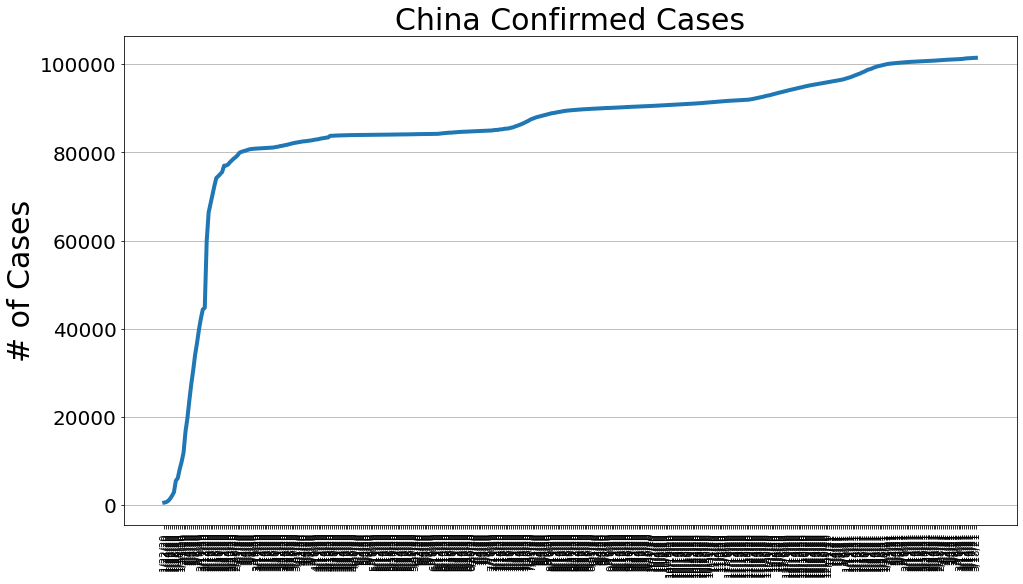

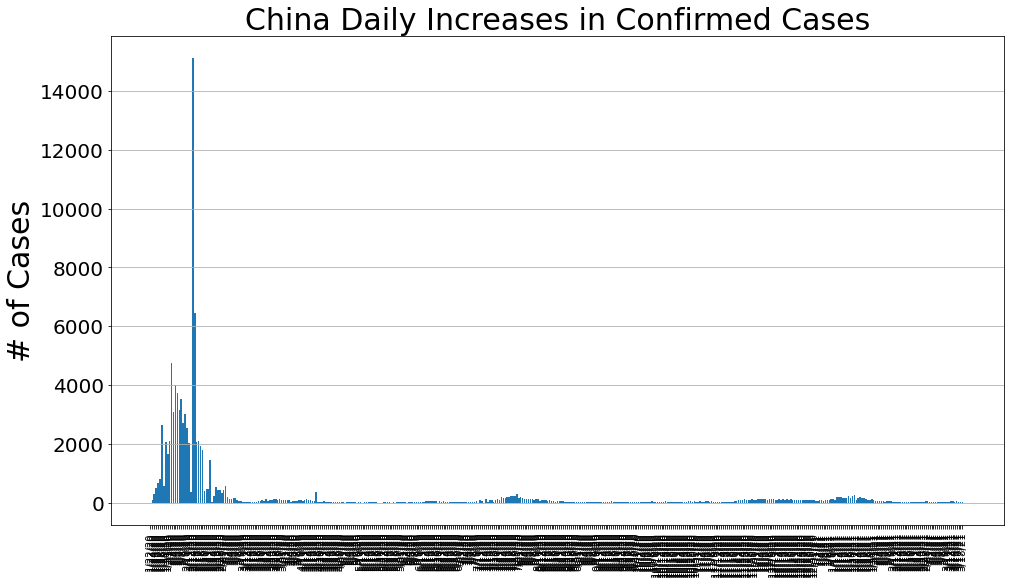

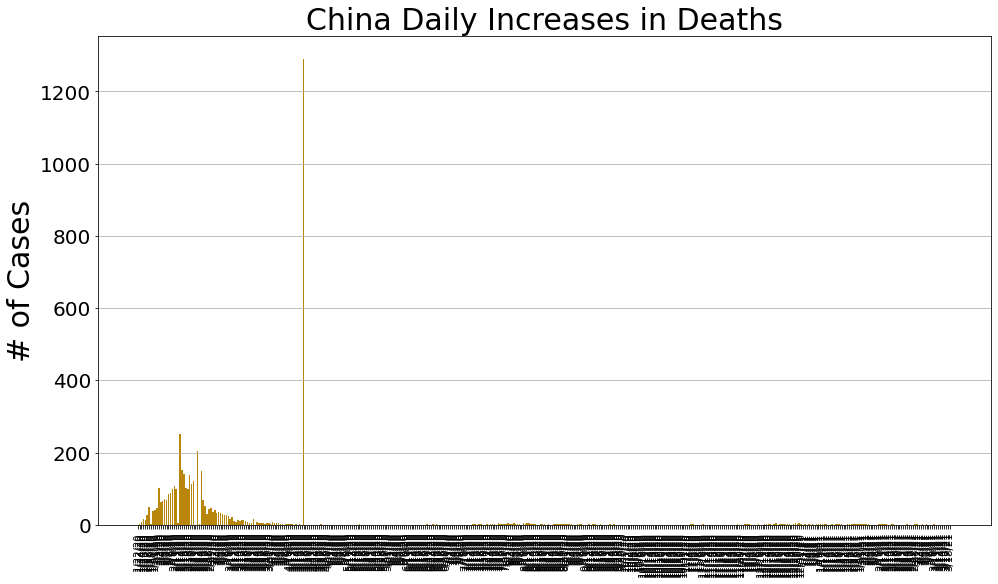

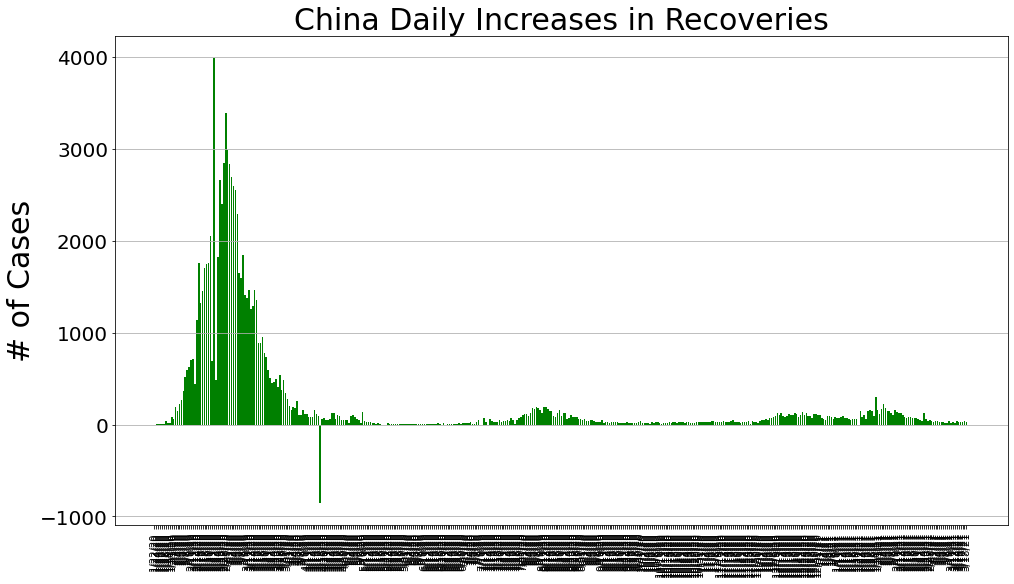

In [31]:
country = 'China'
china_cases, china_deaths, china_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
country_plot(dates, china_cases, daily_increase, daily_death, daily_recovery, country)

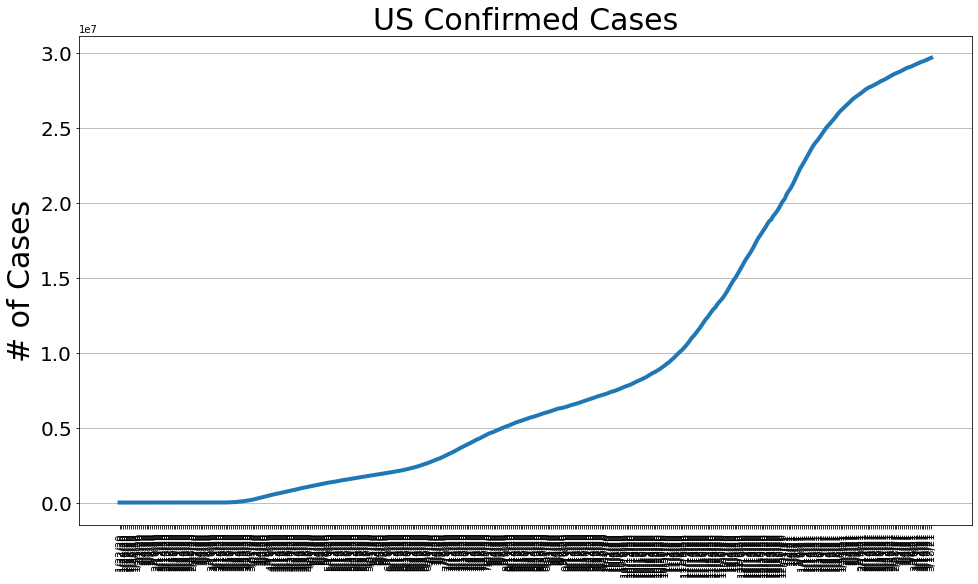

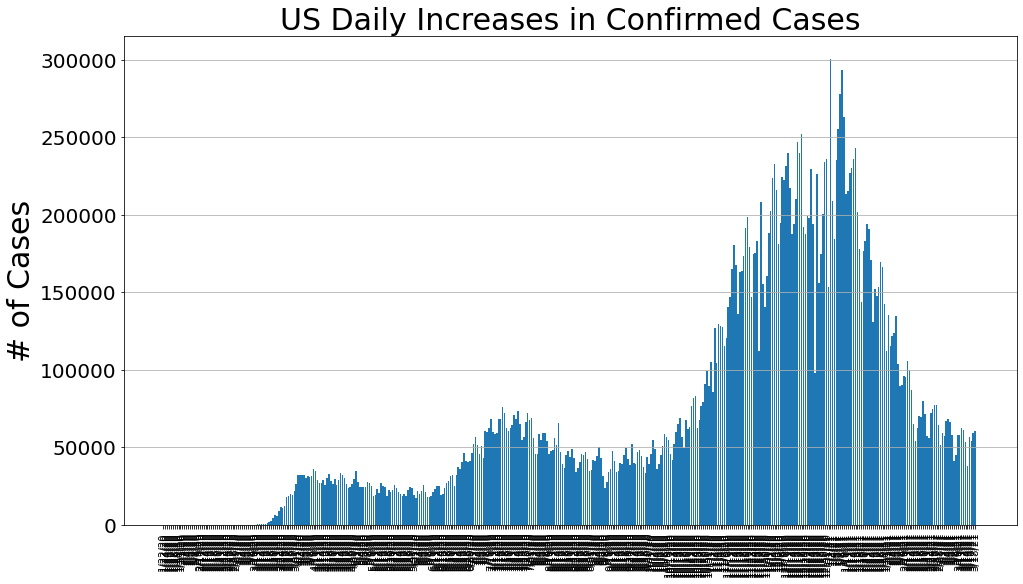

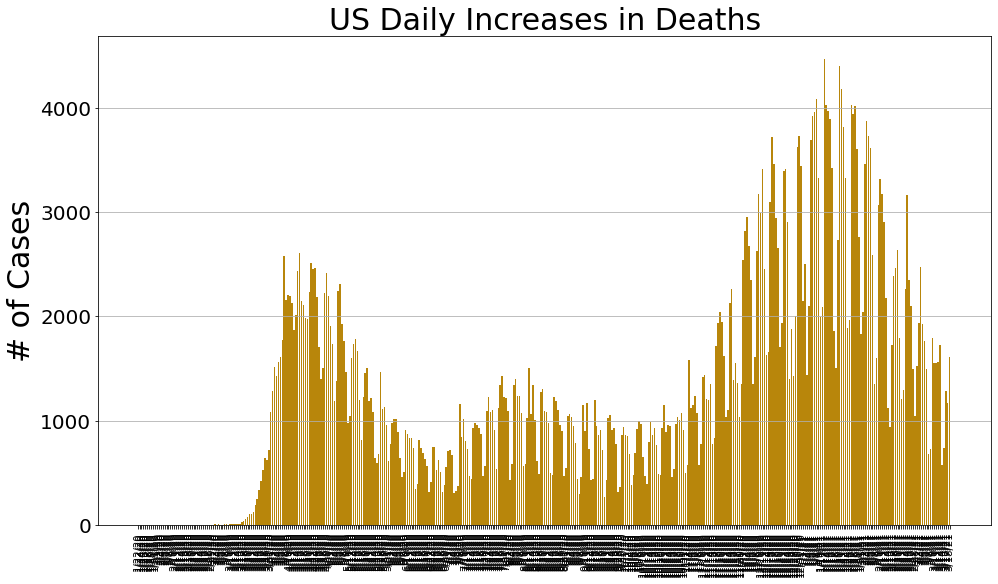

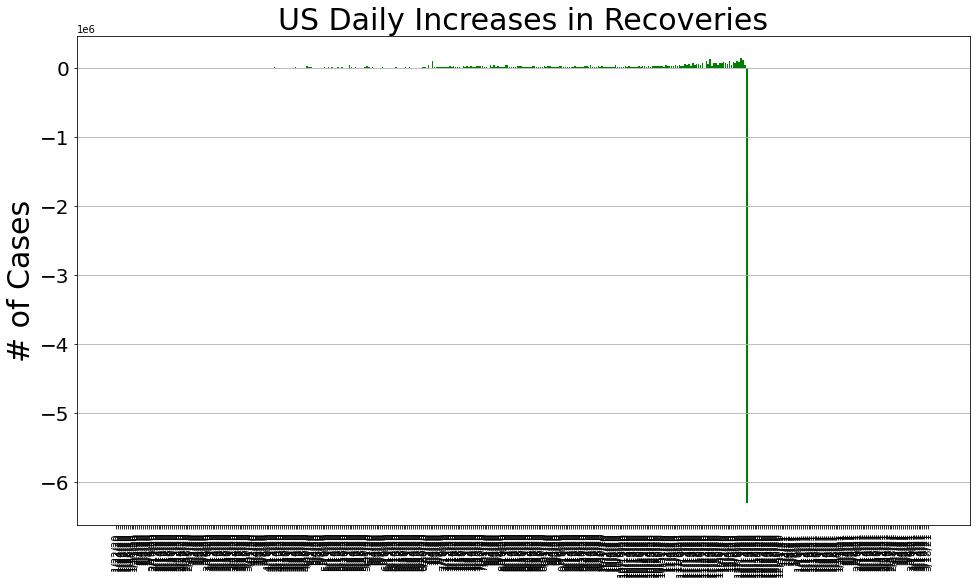

In [32]:
country = 'US'
us_cases, us_deaths, us_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
country_plot(dates, us_cases, daily_increase, daily_death, daily_recovery, country)

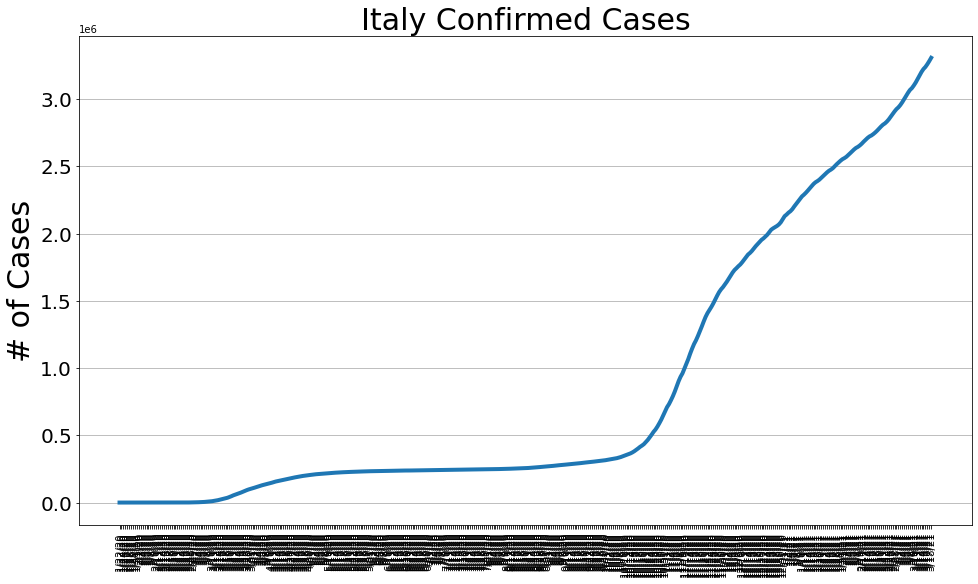

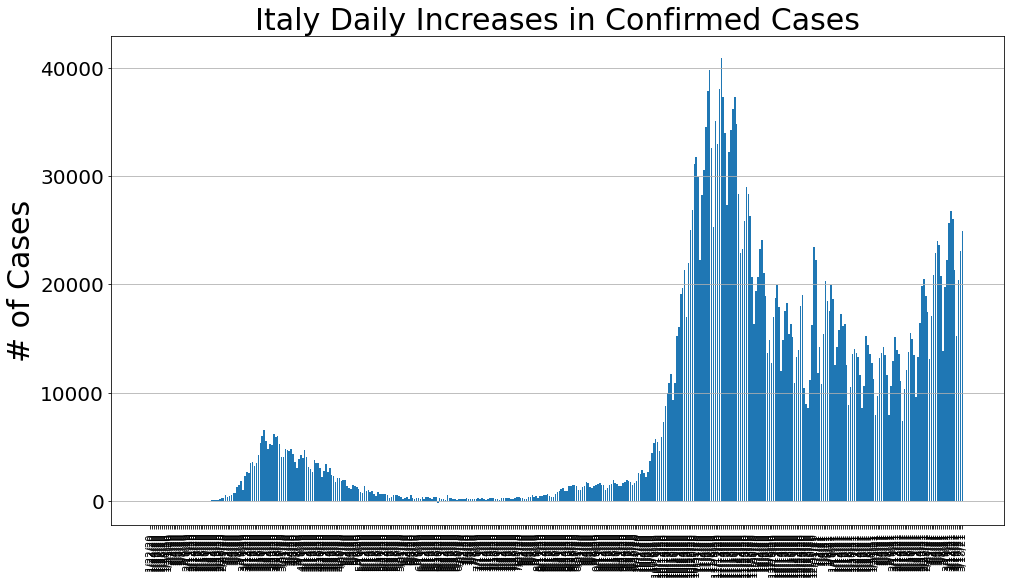

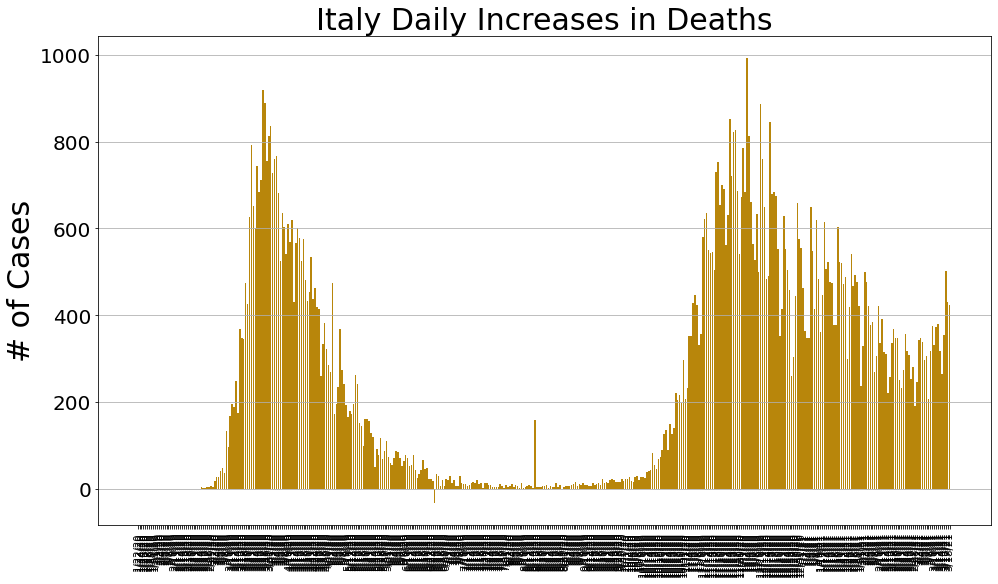

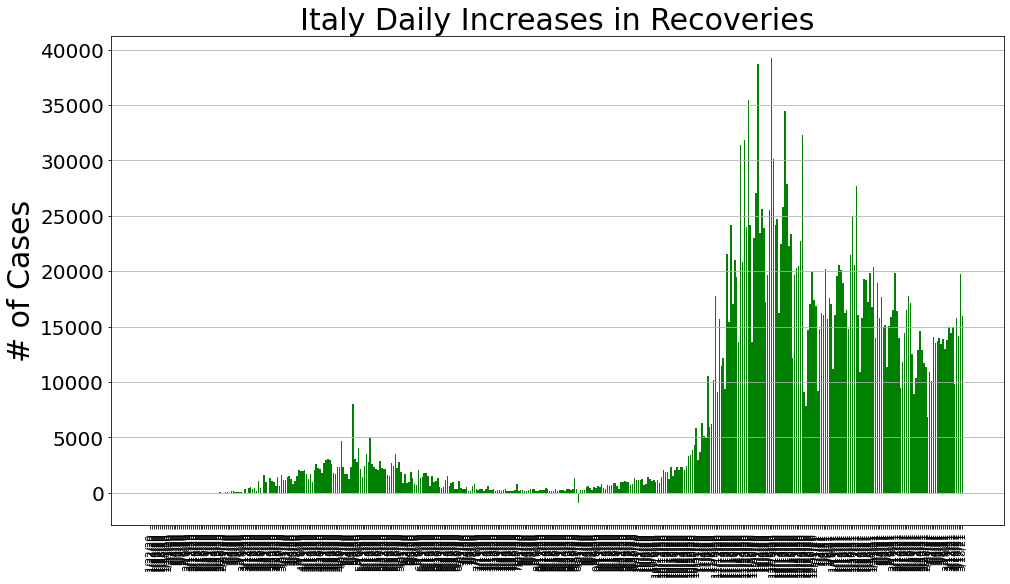

In [33]:
country = 'Italy'
italy_cases, italy_deaths, italy_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
country_plot(dates, italy_cases, daily_increase, daily_death, daily_recovery, country)

In [34]:
country = 'Spain'
spain_cases, spain_deaths, spain_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
# country_plot(dates, spain_cases, daily_increase, daily_death, daily_recovery, country)

In [35]:
country = 'France'
france_cases, france_deaths, france_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
# country_plot(dates, france_cases, daily_increase, daily_death, daily_recovery, country)

In [36]:
country = 'Germany'
germany_cases, germany_deaths, germany_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
# country_plot(dates, germany_cases, daily_increase, daily_death, daily_recovery, country)

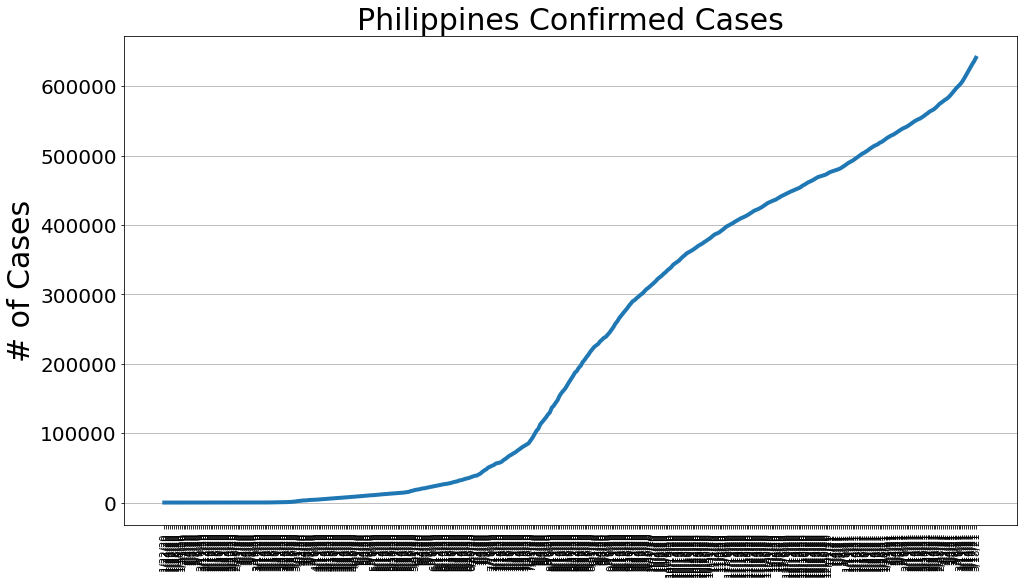

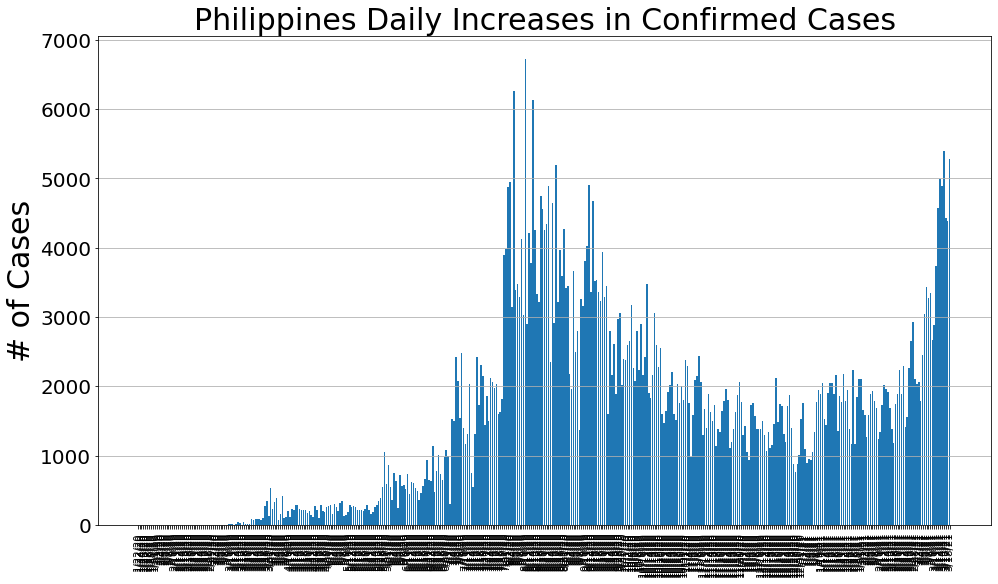

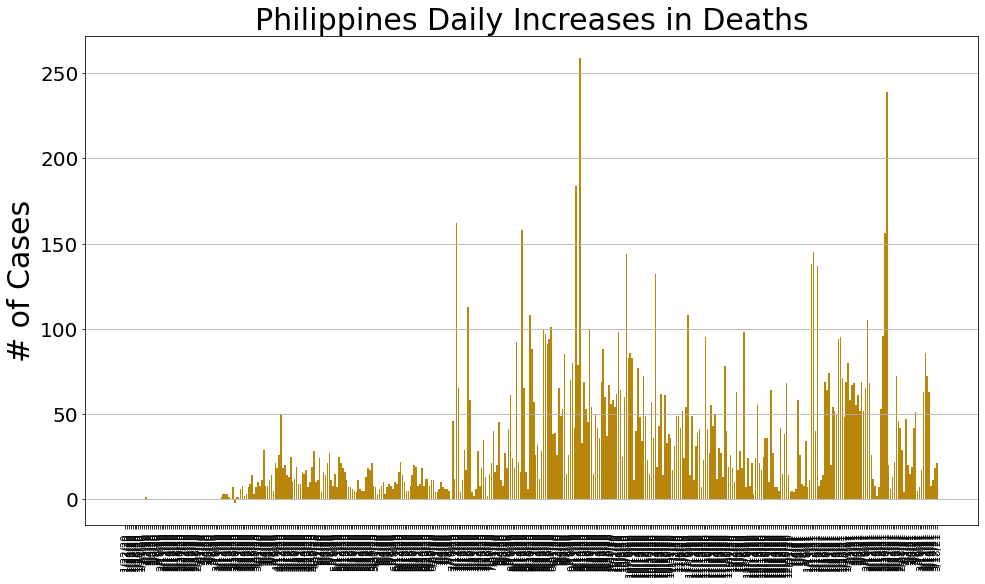

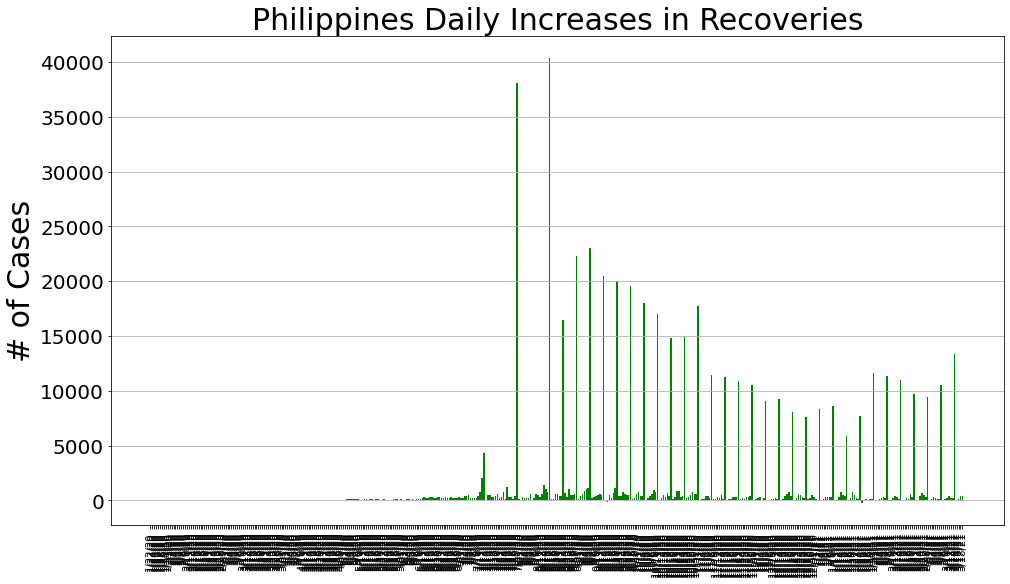

In [37]:
country = 'Philippines'
philippine_cases, philippine_deaths, philippine_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
country_plot(dates, philippine_cases, daily_increase, daily_death, daily_recovery, country)

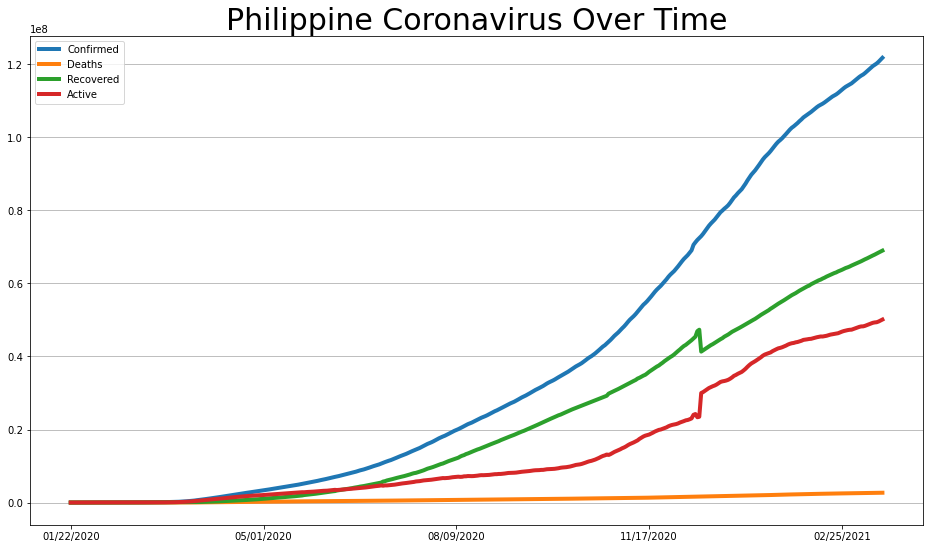

In [38]:
# philippine_cases, philippine_deaths, philippine_recoveries, daily_increase, daily_death,daily_recovery
philippine_total_active = (np.array(philippine_cases)-np.array(philippine_deaths)-np.array(philippine_recoveries)).tolist()
philippine_covid_df = pd.DataFrame(
    {'Confirmed': philippine_cases,
     'Deaths'   : philippine_deaths,
     'Recovered': philippine_recoveries,
     'Active'   : philippine_total_active
    }, index=dates_dt)
covid_df.plot(figsize=(16, 9), linewidth=4).grid(axis='y')
plt.title('Philippine Coronavirus Over Time', size=30);

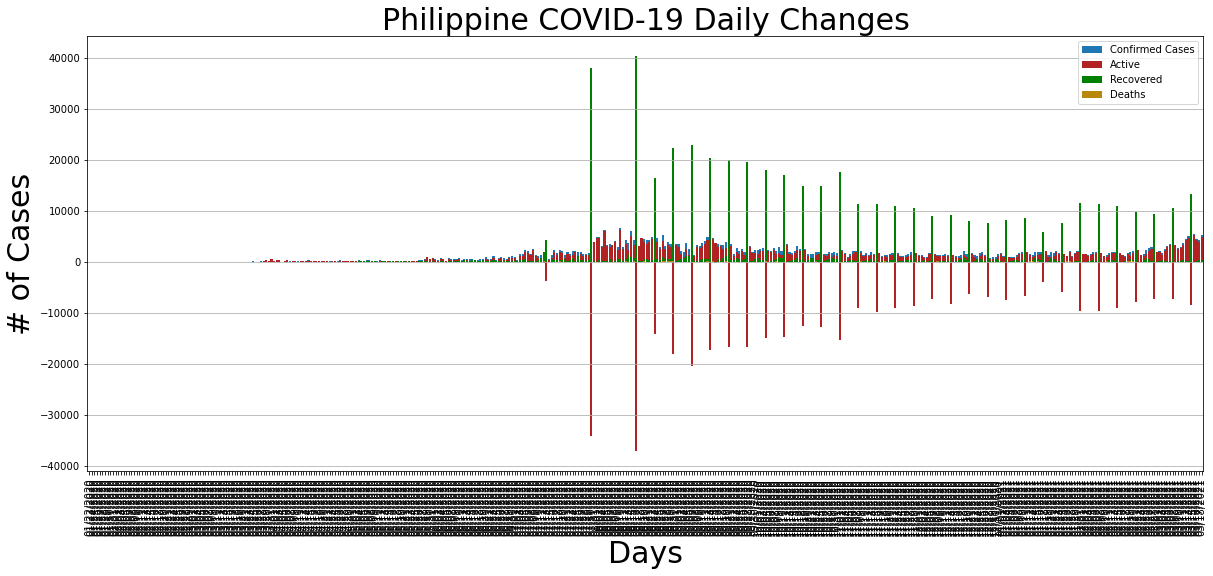

In [39]:
ph_daily_change = philippine_covid_df.diff()
ph_daily_change.Confirmed.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, label='Confirmed Cases', legend=True).grid(axis='y')
ph_daily_change.Active.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='firebrick', label='Active', legend=True).grid(axis='y')
ph_daily_change.Recovered.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='green', label='Recovered', legend=True).grid(axis='y')
ph_daily_change.Deaths.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='darkgoldenrod', label='Deaths', legend=True).grid(axis='y')
plt.title('Philippine COVID-19 Daily Changes', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('# of Cases', size=30);

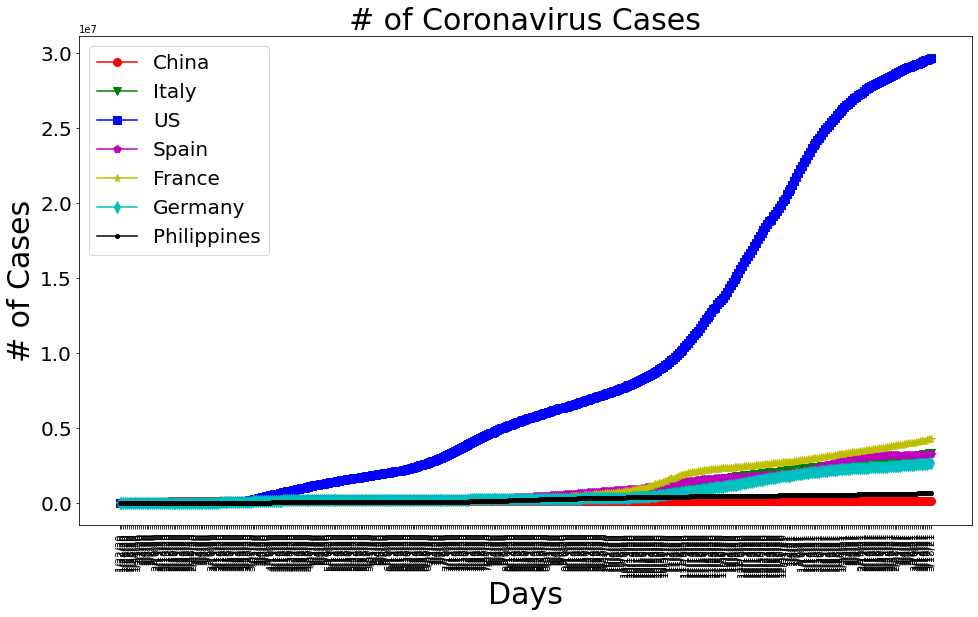

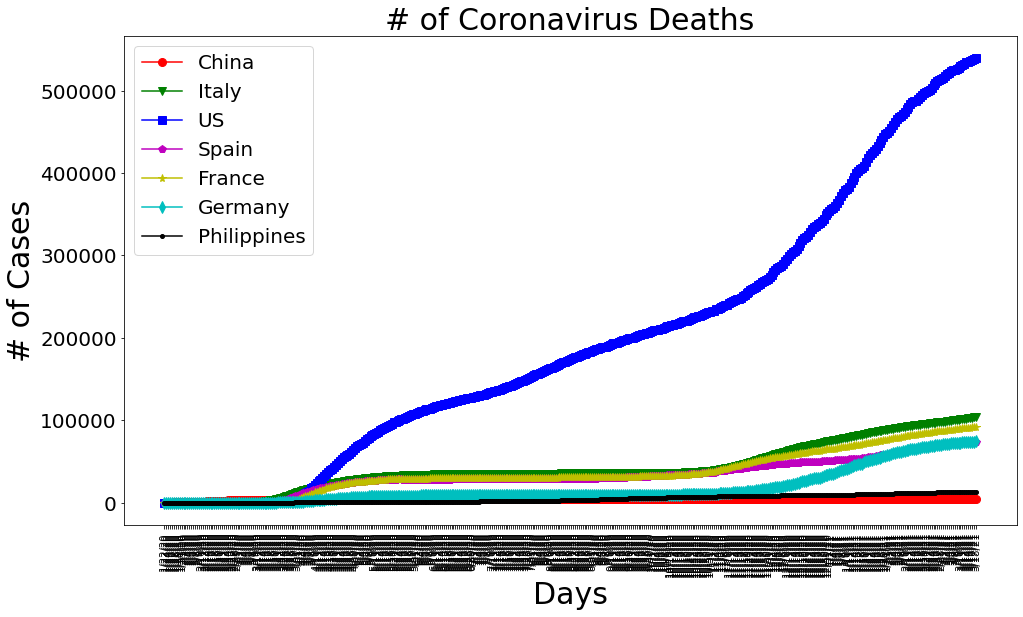

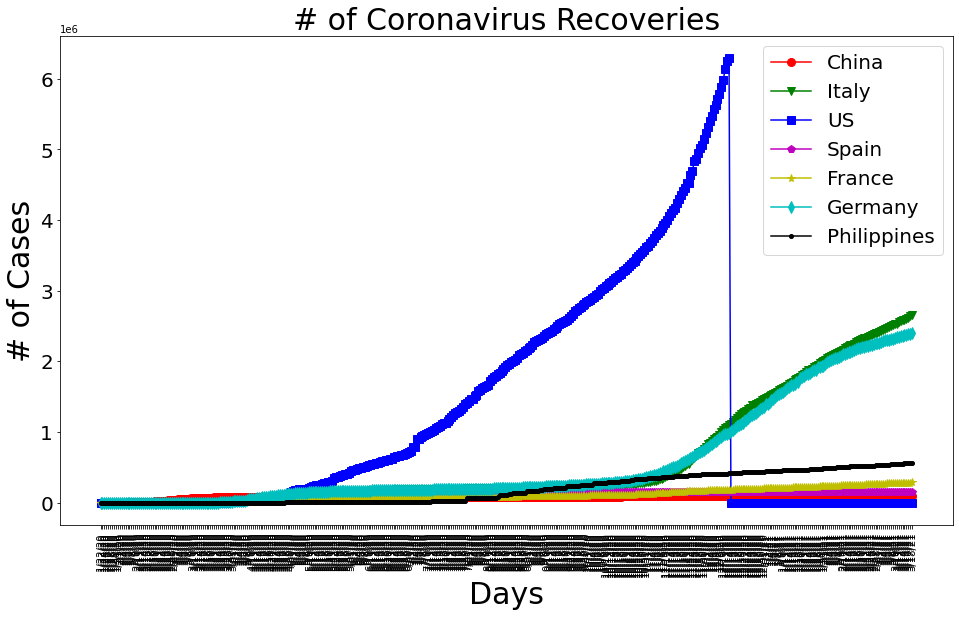

In [42]:
plt.figure(figsize=(16, 9))
plt.plot(dates, china_cases, 'ro-', markersize=8)
plt.plot(dates, italy_cases, 'gv-', markersize=8)
plt.plot(dates, us_cases, 'bs-', markersize=8)
plt.plot(dates, spain_cases, 'mp-', markersize=8)
plt.plot(dates, france_cases, 'y*-', markersize=8)
plt.plot(dates, germany_cases, 'cd-', markersize=8)
plt.plot(dates, philippine_cases, 'k.-', markersize=8)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany','Philippines'], prop={'size': 20})
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(dates, china_deaths, 'ro-', markersize=8)
plt.plot(dates, italy_deaths, 'gv-', markersize=8)
plt.plot(dates, us_deaths, 'bs-', markersize=8)
plt.plot(dates, spain_deaths, 'mp-', markersize=8)
plt.plot(dates, france_deaths, 'y*-', markersize=8)
plt.plot(dates, germany_deaths, 'cd-', markersize=8)
plt.plot(dates, philippine_deaths, 'k.-', markersize=8)
plt.title('# of Coronavirus Deaths', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany','Philippines'], prop={'size': 20})
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(dates, china_recoveries, 'ro-', markersize=8)
plt.plot(dates, italy_recoveries, 'gv-', markersize=8)
plt.plot(dates, us_recoveries, 'bs-', markersize=8)
plt.plot(dates, spain_recoveries, 'mp-', markersize=8)
plt.plot(dates, france_recoveries, 'y*-', markersize=8)
plt.plot(dates, germany_recoveries, 'cd-', markersize=8)
plt.plot(dates, philippine_recoveries, 'k.-', markersize=8)
plt.title('# of Coronavirus Recoveries', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany','Philippines'], prop={'size': 20})
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.show()

## Mortality

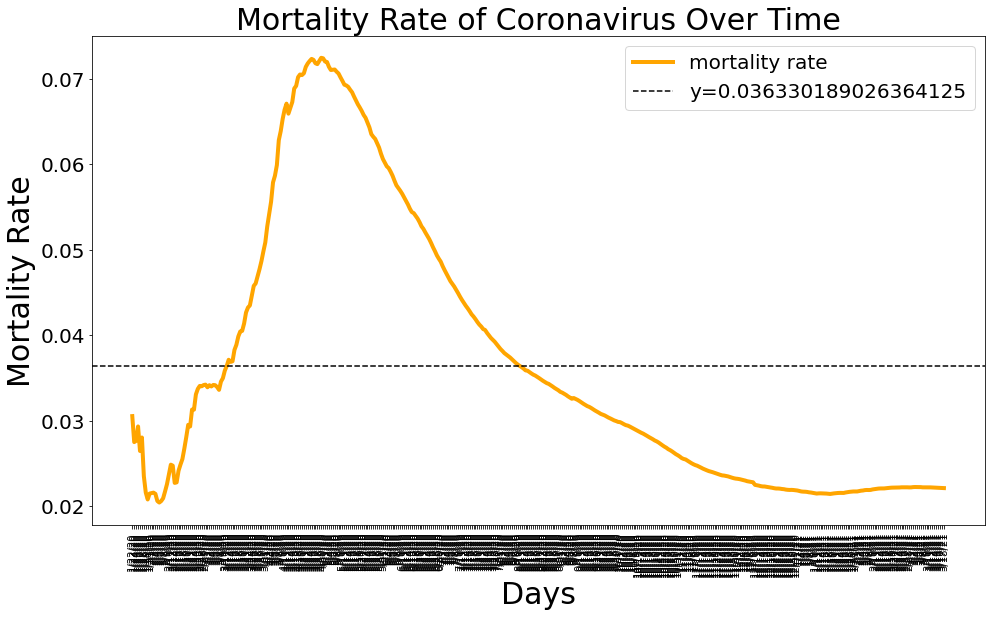

In [44]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(dates, mortality_rate, color='orange', linewidth=4)
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.show()

## Recovery Rate

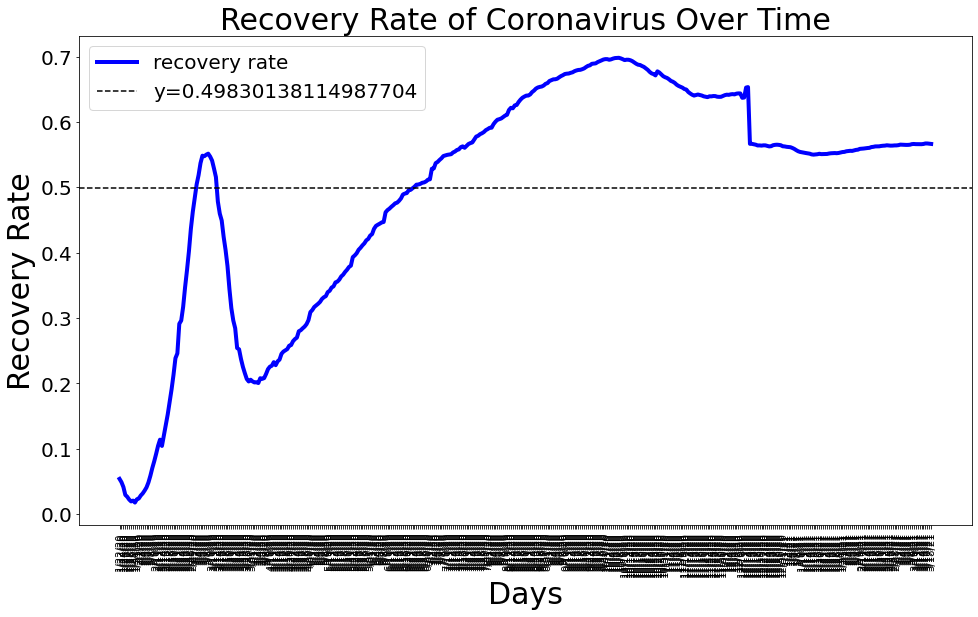

In [45]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(dates, recovery_rate, color='blue', linewidth=4)
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.show()

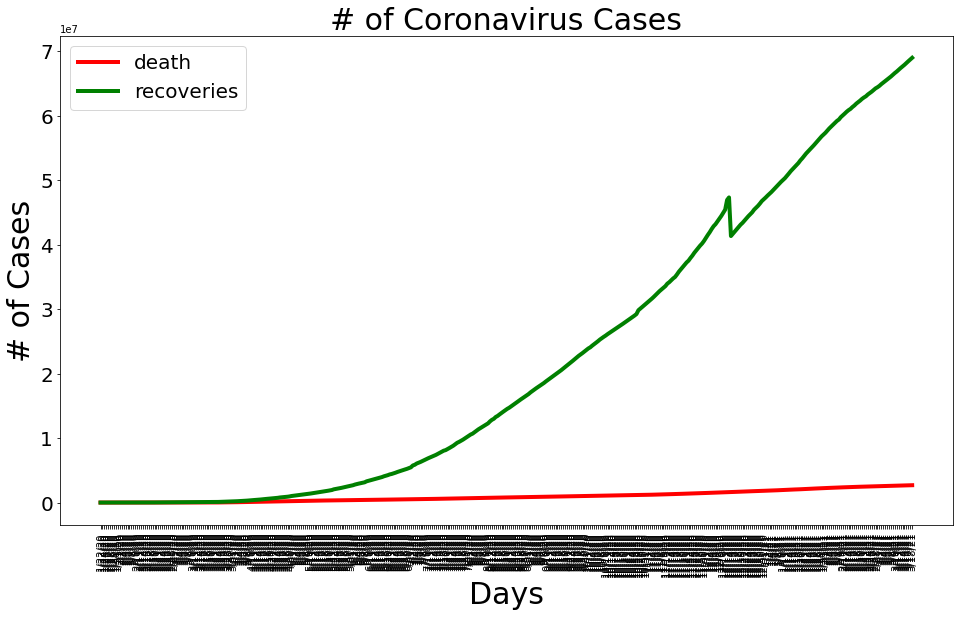

In [46]:
plt.figure(figsize=(16, 9))
plt.plot(dates, total_deaths, color='red', linewidth=4)
plt.plot(dates, total_recovered, color='green', linewidth=4)
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.show()

## COVID-19 By Country

In [47]:
import operator

unique_countries =  list(latest_data['Country_Region'].unique())

country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [48]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Greens')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,668131,33279,54703,580149,0.049809
1,Spain,184948,19315,74797,90836,0.104435
2,Italy,168941,22170,40164,106607,0.131229
3,France,146182,17922,33327,94933,0.122601
4,Germany,137698,4052,77000,56646,0.029427
5,United Kingdom,104145,13759,375,90011,0.132114
6,China,83403,3346,78401,1656,0.040118
7,Iran,77995,4869,52229,20897,0.062427
8,Turkey,74193,1643,7089,65461,0.022145
9,Belgium,34809,4857,7562,22390,0.139533


## COVID-19 By Provinces/State/City

In [49]:
unique_provinces =  list(latest_data['Province_State'].unique())

province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [50]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries' : province_recovery_cases,
                          'Mortality Rate': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Greens')

,Province/State Name,Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Mortality Rate
0,New York,US,223691,14832,0,0.066306
1,New Jersey,US,75317,3518,0,0.046709
2,Hubei,China,67803,3222,64435,0.047520
3,Massachusetts,US,32181,1108,0,0.034430
4,Michigan,US,28809,1996,0,0.069284
5,Pennsylvania,US,28258,841,0,0.029761
6,California,US,27687,956,0,0.034529
7,Illinois,US,25734,1072,0,0.041657
8,Florida,US,23343,668,0,0.028617
9,Louisiana,US,22532,1156,0,0.051305


In [51]:
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

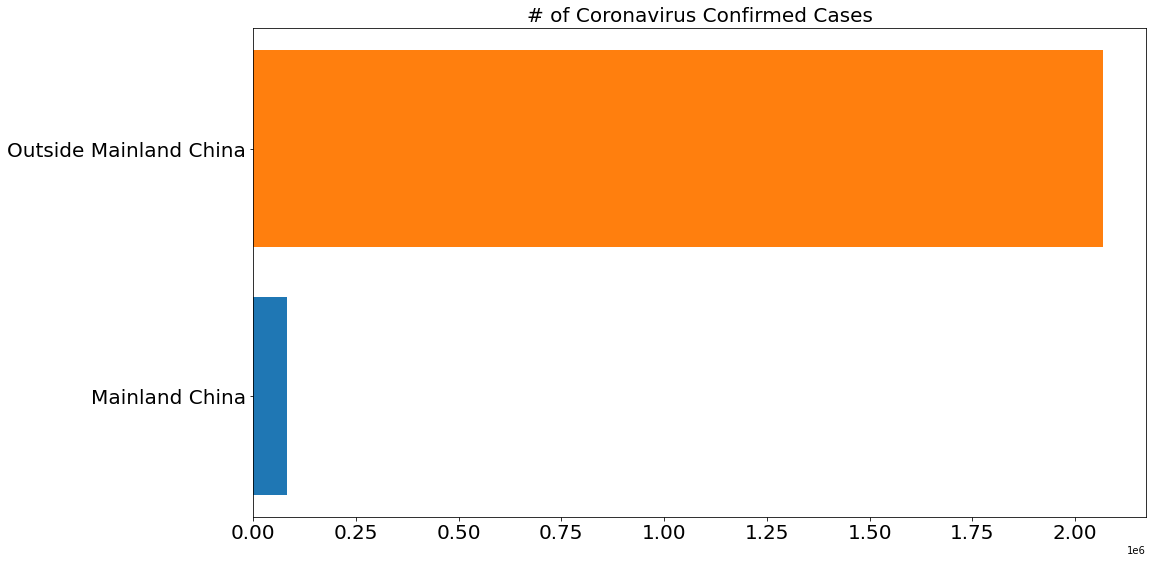

In [52]:
china_confirmed = latest_data[latest_data['Country_Region']=='China']['Confirmed'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('# of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [53]:
print('Outside Mainland China: {} cases'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China: 2068744 cases
Mainland China: 83403 cases
Total: 2152147 cases


In [54]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [55]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

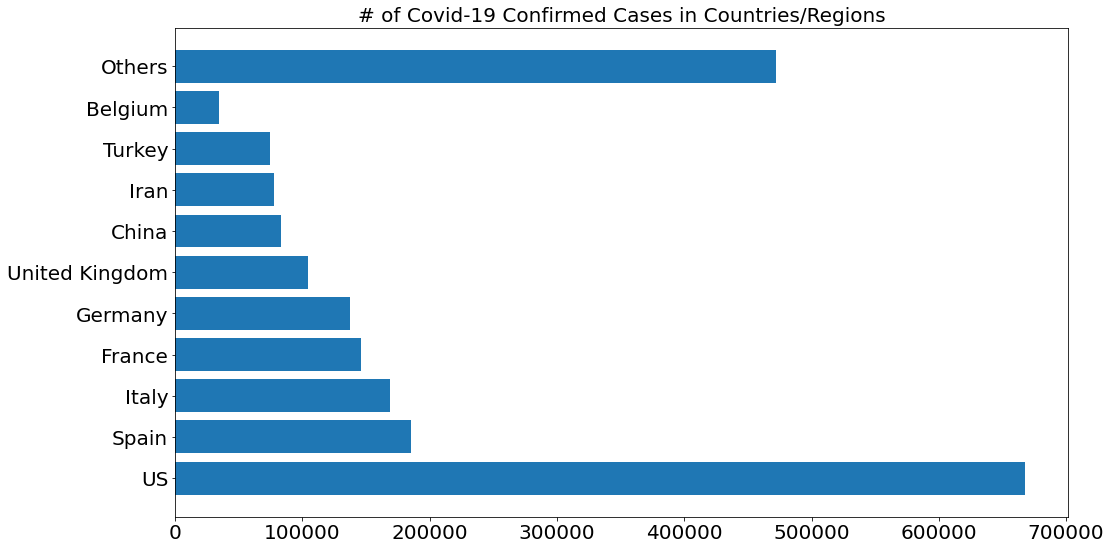

In [56]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases in Countries/Regions')

In [57]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the other category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

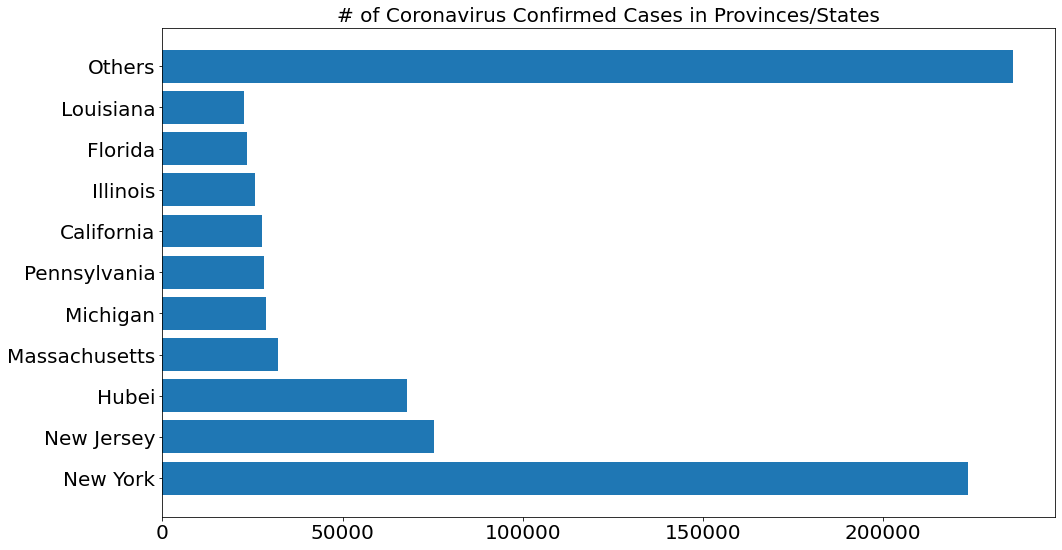

In [58]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, '# of Coronavirus Confirmed Cases in Provinces/States')

In [59]:
import matplotlib.colors as mcolors


def plot_pie_charts(x, y, title): 
    random.seed(23)
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

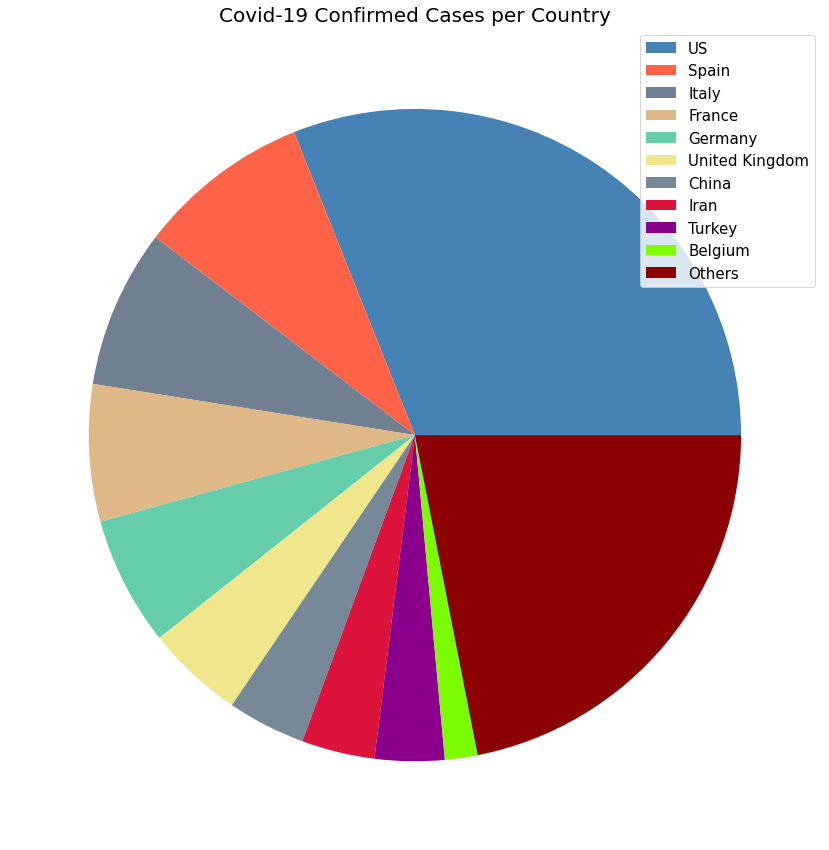

In [60]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

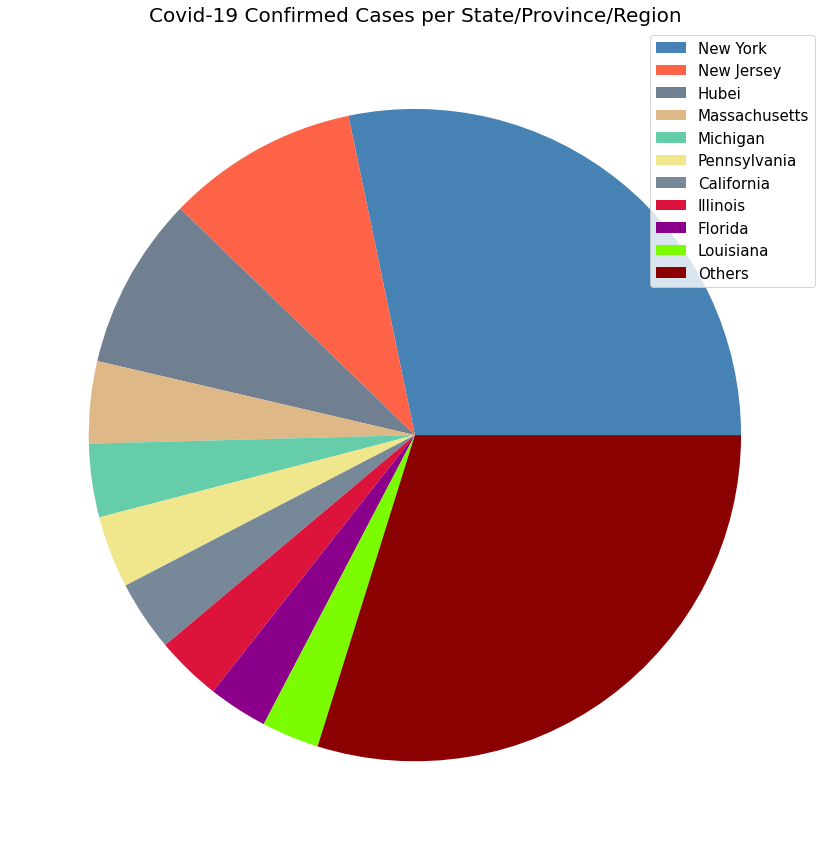

In [61]:
plot_pie_charts(visual_unique_provinces, visual_confirmed_cases2, 'Covid-19 Confirmed Cases per State/Province/Region')

In [62]:
# Plotting countries with regional data using a pie chart 

def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

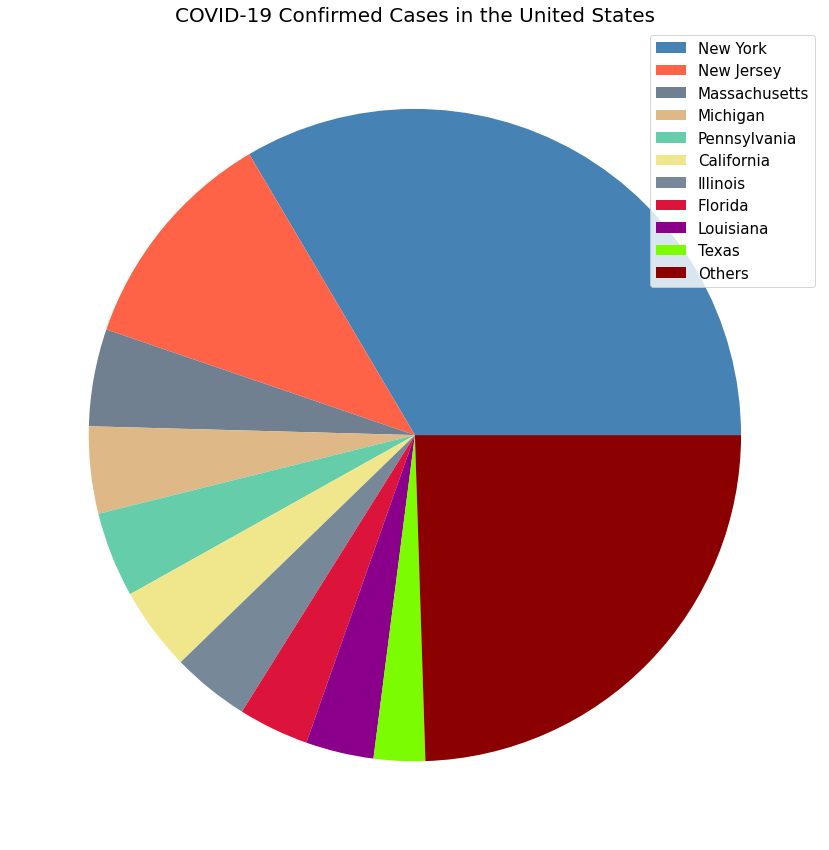

In [63]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')

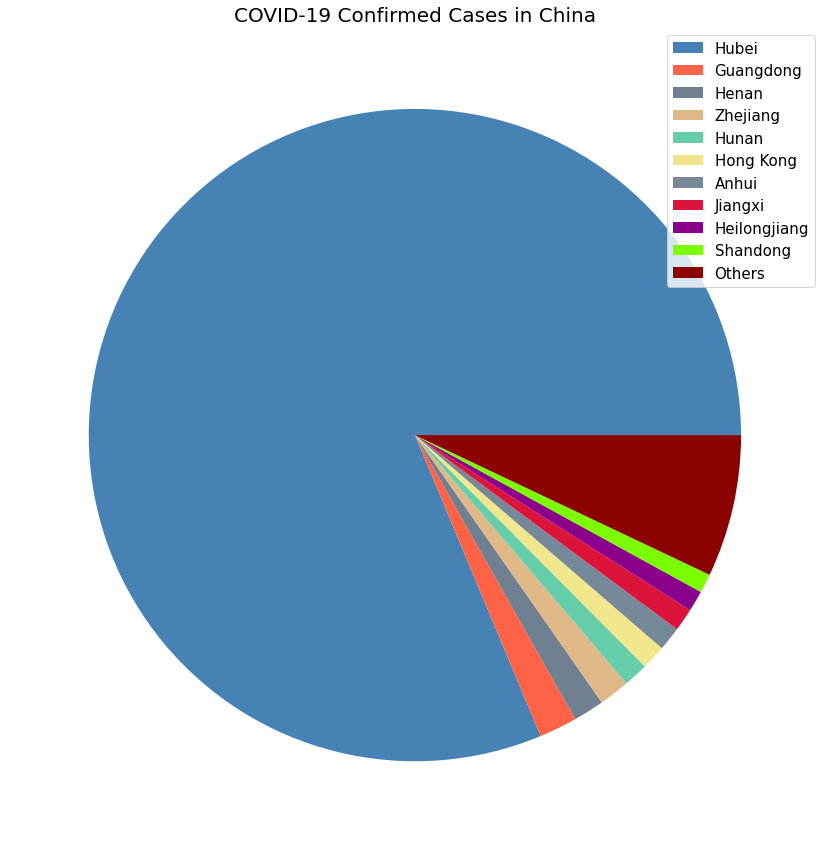

In [64]:
plot_pie_country_with_regions('China', 'COVID-19 Confirmed Cases in China')